<a href="https://www.kaggle.com/code/austinhe1/assignment-2-mobile-price-predictor?scriptVersionId=123062867" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Dataset

Dataset from: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

The dataset is split into a train and test dataset in a csv format. 

There are 2000 rows of data in the train set and 1000 rows in the test set. 

Both dataset have 21 features including:
- battery_power
- blue
- clock_speed
- dual_sim
- fc
- four_g
- int_memory
- m_dep
- mobile_wt
- n_cores
- px_height
- px_width
- ram
- sc_h
- sc_w
- talk_time
- three_g
- touch_screen
- wifi

The train dataset has an extra feature of 'price_range' and the test dataset has the target variable 'id'.

# Model Goal

The goal of this model is to predict the price range of a mobile phone using their features.

## Import library and read data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
trainDf = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
testDf = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

x_features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']

X = trainDf[x_features]
y = trainDf['price_range']

In [3]:
print(f"Train dataset length: {len(trainDf)}")
print(f"Test dataset length: {len(testDf)}")

Train dataset length: 2000
Test dataset length: 1000


In [4]:
trainDf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
testDf.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Exploratory Data Analysis

Significant variables include:
- battery_power
- int_memory
- mobile_wt
- n_cores
- px_height
- px_width
- ram
- sc_h
- talk_time

These variables are determined by using a chi-square test as well as looking at the p-values from ordinary least squares.

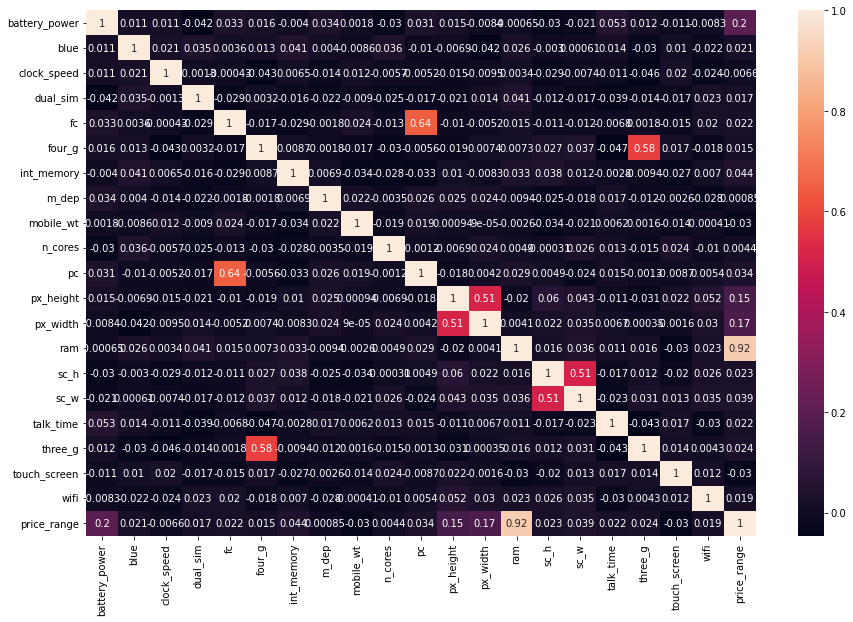

In [6]:
# Compute the correlation matrix
corr = trainDf.corr()
plt.figure(figsize=(15, 10))
# plot the heatmap
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.subplots_adjust(bottom=0.15)

Other than Px height, all other features seem to be evenly distributed.

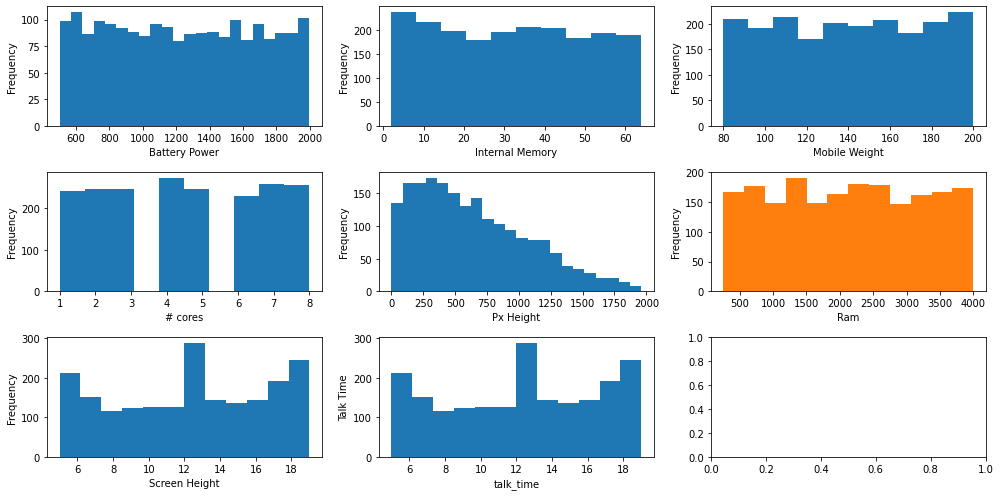

In [7]:
# Increase number of columns that display on one line.
pd.set_option('display.width', 1000)
# This line allows us to set the figure size supposedly in inches.
# When rendered in the IDE the output often does not translate to inches. 
plt.subplots(nrows=3, ncols=3,  figsize=(14,7))

plt.subplot(3, 3, 1) # Specfies total rows, columns and image #
                     # where images are drawn clockwise.
plt.hist(trainDf["battery_power"], bins=22)
plt.xlabel("Battery Power")
plt.ylabel("Frequency")

plt.subplot(3, 3, 2)
plt.hist(trainDf["int_memory"], bins=10)
plt.xlabel("Internal Memory")
plt.ylabel("Frequency")

# 1 is married
# 2 is unmarried
plt.subplot(3, 3, 3)
plt.hist(trainDf["mobile_wt"], bins=10)
plt.xlabel("Mobile Weight")
plt.ylabel("Frequency")

# 1 is married. 2 is unmarried.
plt.subplot(3, 3, 4)
plt.hist(trainDf["n_cores"], bins=10)
plt.xlabel("# cores")
plt.ylabel("Frequency")

plt.subplot(3, 3, 5) # of rows, # of columns, # plots.
plt.hist(trainDf["px_height"], bins=22)
plt.xlabel("Px Height")
plt.ylabel("Frequency")

plt.subplot(3, 3, 6)
plt.hist(trainDf["ram"], bins=12)
plt.xlabel("Ram")
plt.ylabel("Frequency")

plt.subplot(3, 3, 6)
plt.hist(trainDf["ram"], bins=12)
plt.xlabel("Ram")
plt.ylabel("Frequency")

plt.subplot(3, 3, 7)
plt.hist(trainDf["sc_h"], bins=12)
plt.xlabel("Screen Height")
plt.ylabel("Frequency")

plt.subplot(3, 3, 8)
plt.hist(trainDf["sc_h"], bins=12)
plt.xlabel("talk_time")
plt.ylabel("Talk Time")

plt.tight_layout()
plt.show()


## OLS to get Significant Variables

p-scores that are greater than 0.05 are insignificant and should be dropped.

This includes:
- fc
- four_g
- sc_w
- touch_screen

In [8]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Model and make predictions.
model       = sm.OLS(y_train, X_train).fit()
print(model.summary())
predictions = model.predict(X_test)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

                                 OLS Regression Results                                
Dep. Variable:            price_range   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              1930.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                        0.00
Time:                        21:58:07   Log-Likelihood:                         -626.12
No. Observations:                1500   AIC:                                      1290.
Df Residuals:                    1481   BIC:                                      1391.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Chi-Square Score to get Significant Variables

Columns that have less than a chi-square score of 3.8 should be dropped

| column num | chi-square score | feature |
|:-- |:-- |:--|
| 0 | 14130.0 | battery_power |
| 1 | 0.7232 | blue |
| 2 | 0.6484 | clock_speed |
| 3 | 0.631 | dual_sim |
| 4 | 10.14 | fc |
| 5 | 1.522 | four_g |
| 6 | 89.84 | int_memory |
| 7 | 0.7458 | m_dep |
| 8 | 95.97 | mobile_wt |
| 9 | 9.098 | n_cores |
| 10 | 17360.0 | px_height |
| 11 | 9811.0 | px_width |
| 12 | 931300.0 | ram |
| 13 | 9.615 | sc_h |
| 14 | 16.48 | sc_w |
| 15 | 13.24 | talk_time |
| 16 | 0.3276 | three_g |
| 17 | 1.928 | touch_screen |
| 18 | 0.4221 | wifi |

Columns that should be dropped include:
- blue
- clock_speed
- dual_sim
- four_g
- m_dep
- three_g
- touch_screen
- wifi



In [9]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Show chi-square scores for each feature.
# There is 1-degree freedom since 1 predictor during feature evaluation.
# Generally, >=3.8 is good)
test      = SelectKBest(score_func=chi2, k=3)
chiScores = test.fit(X, y) # Summarize scores
np.set_printoptions(precision=3)
print("\nPredictor Chi-Square Scores: " + str(chiScores.scores_))


Predictor Chi-Square Scores: [1.413e+04 7.232e-01 6.484e-01 6.310e-01 1.014e+01 1.522e+00 8.984e+01
 7.458e-01 9.597e+01 9.098e+00 1.736e+04 9.811e+03 9.313e+05 9.615e+00
 1.648e+01 1.324e+01 3.276e-01 1.928e+00 4.221e-01]


## Remove insignificant variables

In [10]:
# Re-assign X with significant columns only.
X = trainDf[['battery_power','int_memory','mobile_wt','n_cores','px_height','px_width','ram','sc_h','talk_time']]

# Split data.
X_train,X_test,y_train,y_test = train_test_split(
        X, y, test_size=0.25,random_state=0)

# Create models and predict

Stochastic Gradient Descent, Decision Tree Classifier and Random Forest Classifier models are built then used to predict the price_range.

RandomForestClassifier has the highest accuracy of the three models so it will be used to predict the target variable.

In [11]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))


                                 OLS Regression Results                                
Dep. Variable:            price_range   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              3615.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                        0.00
Time:                        21:58:08   Log-Likelihood:                         -703.62
No. Observations:                1500   AIC:                                      1425.
Df Residuals:                    1491   BIC:                                      1473.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Stochastic Gradient Descent Model

In [12]:
print("\nStochastic Gradient Descent")
# Stochastic gradient descent models are sensitive to differences
# in scale so a StandardScaler is usually used.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_trainScaled = scaler.transform(X_train)
X_testScaled  = scaler.transform(X_test)

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_trainScaled, y_train)

y_pred = clf.predict(X_testScaled)

# Show confusion matrix and accuracy scores.
confusion_matrix = pd.crosstab(y_test, y_pred,
                               rownames=['Actual'],
                               colnames=['Predicted'])

print('\nAccuracy: ',metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix")
print(confusion_matrix)



Stochastic Gradient Descent

Accuracy:  0.776

Confusion Matrix
Predicted    0   1   2    3
Actual                     
0          119   5   0    0
1            6  59  45    0
2            0  50  71    4
3            0   1   1  139


## DecisionTreeClassifier Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

def showAccuracyScores(y_test, y_pred):
    print("\nModel Evaluation")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("")
    tn = cm[0][0]
    fp = cm[0][1]
    tp = cm[1][1]
    fn = cm[1][0]
    accuracy  = (tp + tn)/(tn + fp + tp + fn)
    precision = tp/(tp + fp)
    recall    = tp/(tp + fn)
    print("Accuracy: " + str(accuracy))
    print("Precision: " + str(precision))
    print("Recall: " + str(recall))

showAccuracyScores(y_test, y_pred)


Model Evaluation
[[101  23   0   0]
 [  9  84  17   0]
 [  0  30  69  26]
 [  0   0  14 127]]

Accuracy: 0.8525345622119815
Precision: 0.7850467289719626
Recall: 0.9032258064516129


## Random Forest Model

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=rf.predict(X_test)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.898


# Save the model to a pickle file

In [15]:
import pickle

# Save the model.
with open('model_pkl', 'wb') as files:
    pickle.dump(rf, files)